In [3]:
import sys
sys.path.append('../')
from jax import numpy as jnp
from jax import config
config.update("jax_enable_x64", True)
from src_jax import measure, factor
from matplotlib import pyplot as plt

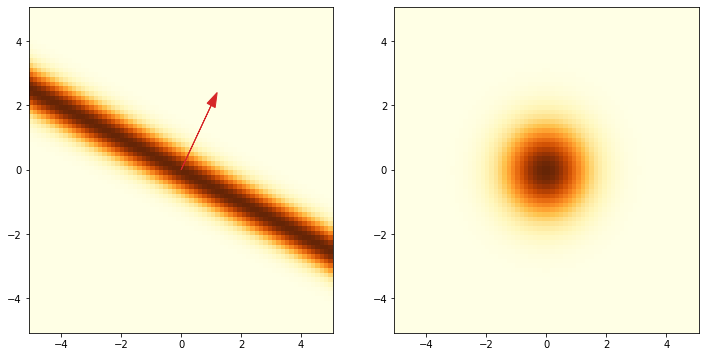

In [14]:
w = jnp.array([1.,2])
h_tilde = 0

# Note: we have to do a transform because the factor are parametrized through natural parameters.
kernel = factor.OneRankFactor(v=jnp.array([w]), nu=jnp.array([w * h_tilde]), ln_beta=jnp.array([-.5 * h_tilde ** 2]))

grid_points = 70
xrange = jnp.linspace(-5,5,grid_points)
xmesh, ymesh = jnp.meshgrid(xrange, xrange)
x = jnp.vstack([xmesh.flatten(), ymesh.flatten()]).T

kernel_eval = kernel.evaluate(x).reshape(grid_points, grid_points)

w_rbf = jnp.array([1.,1.])
mu_rbf = jnp.array([0,0])
Lambda_rbf = jnp.diag(1./w_rbf)
nu_rbf = jnp.dot(Lambda_rbf, mu_rbf)
ln_beta_rbf = - .5 * jnp.sum(nu_rbf * mu_rbf)
rbf = measure.GaussianDiagMeasure(Lambda=jnp.array([Lambda_rbf]), nu=jnp.array([nu_rbf]), ln_beta=jnp.array([ln_beta_rbf]))
rbf_eval = rbf.evaluate(x).reshape(grid_points, grid_points)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.pcolor(xrange, xrange, kernel_eval, shading='nearest', cmap='YlOrBr')
plt.arrow(.5*h_tilde/w[0],.5*h_tilde/w[1],w[0],w[1],head_width=.3, color='C3')
plt.subplot(122)
plt.pcolor(xrange, xrange, rbf_eval, shading='nearest', cmap='YlOrBr')
plt.show()

In [9]:
rbf = measure.GaussianDiagMeasure?

Init signature:
measure.GaussianDiagMeasure(
    Lambda: jax._src.numpy.ndarray.ndarray,
    nu: jax._src.numpy.ndarray.ndarray = None,
    ln_beta: jax._src.numpy.ndarray.ndarray = None,
    Sigma: jax._src.numpy.ndarray.ndarray = None,
    ln_det_Lambda: jax._src.numpy.ndarray.ndarray = None,
    ln_det_Sigma: jax._src.numpy.ndarray.ndarray = None,
)
Docstring:      <no docstring>
Init docstring:
A measure with a Gaussian form.

u(x) = beta * exp(- 0.5 * x'Lambda x + x'nu),

D is the dimension, and R the number of Gaussians. 

:param Lambda: jnp.ndarray [R, D, D]
    Information (precision) matrix of the Gaussian distributions. Needs to be postive definite.
:param nu: jnp.ndarray [R, D]
    Information vector of a Gaussian distribution. If None all zeros. (Default=None)
:param ln_beta: jnp.ndarray [R]
    The log constant factor of the factor. If None all zeros. (Default=None)
param Sigma: jnp.ndarray [R, D, D]
    Covariance matrix of the Gaussian distributions. Needs to be positive

In [ ]:
rbf = measure.GaussianDiagMeasure